In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [22]:
# Cargar el archivo CSV
df = pd.read_csv('/content/Dataset_de_Clientes_Electr_nica.csv')

# Ver las primeras 5 filas
df.head()


,ID_Cliente,Edad,Genero,Ingresos,Historial_Compras,Tiempo_En_Sitio,Usa_Cupon,Compra,Ventas_Futuras
0,1,56,F,6387,8,58,0,0,570.12
1,2,46,M,9002,5,93,1,0,603.36
2,3,32,F,6536,7,370,1,1,656.50
3,4,60,M,4913,0,157,0,0,216.32
4,5,25,F,2066,9,351,0,1,326.80


In [23]:
# Resumen estadístico
df.describe()


,ID_Cliente,Edad,Ingresos,Historial_Compras,Tiempo_En_Sitio,Usa_Cupon,Compra,Ventas_Futuras
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,40.810000,5810.733333,4.613333,292.876667,0.490000,0.583333,463.819300
std,86.746758,13.547164,2496.809579,2.829105,171.344715,0.500735,0.493830,151.372757
min,1.000000,18.000000,1009.000000,0.000000,12.000000,0.000000,0.000000,77.240000
25%,75.750000,29.000000,3827.500000,2.000000,148.250000,0.000000,0.000000,354.755000
50%,150.500000,41.500000,5955.000000,5.000000,294.500000,0.000000,1.000000,470.555000
75%,225.250000,52.000000,7997.500000,7.000000,444.000000,1.000000,1.000000,575.690000
max,300.000000,64.000000,9989.000000,9.000000,599.000000,1.000000,1.000000,886.940000


In [24]:
df.isnull().sum()


,0
ID_Cliente,0
Edad,0
Genero,0
Ingresos,0
Historial_Compras,0
Tiempo_En_Sitio,0
Usa_Cupon,0
Compra,0
Ventas_Futuras,0


In [25]:
# Variable objetivo
y = df['Compra']

# Variables predictoras (sin ID ni variables irrelevantes)
X = df[['Edad', 'Ingresos', 'Historial_Compras', 'Tiempo_En_Sitio', 'Usa_Cupon']]


In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Crear modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)

# Entrenar
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
# Hacer predicciones
y_pred = modelo_arbol.predict(X_test)

# Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[21  4]
 [11 24]]

 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.66      0.84      0.74        25
           1       0.86      0.69      0.76        35

    accuracy                           0.75        60
   macro avg       0.76      0.76      0.75        60
weighted avg       0.77      0.75      0.75        60



In [29]:
# Variable dependiente
y_reg = df['Ventas_Futuras']

# Variables independientes
X_reg = df[['Edad', 'Ingresos', 'Historial_Compras', 'Tiempo_En_Sitio', 'Usa_Cupon']]


In [42]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)


In [43]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(Xr_train, yr_train)


LinearRegression()

In [44]:
# Predicciones
yr_pred_lineal = modelo_lineal.predict(Xr_test)

# Evaluación
print("Evaluación de Regresión Lineal:")
print(f"MAE: {mean_absolute_error(yr_test, yr_pred_lineal):.2f}")
print(f"MSE: {mean_squared_error(yr_test, yr_pred_lineal):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(yr_test, yr_pred_lineal)):.2f}")
print(f"R²: {r2_score(yr_test, yr_pred_lineal):.2f}")


Evaluación de Regresión Lineal:
MAE: 52.60
MSE: 4018.52
RMSE: 63.39
R²: 0.83


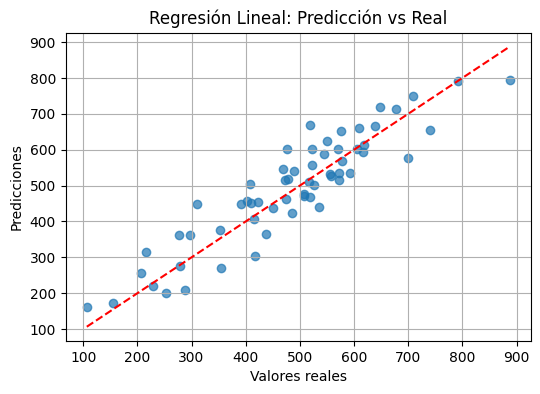

In [45]:
plt.figure(figsize=(6,4))
plt.scatter(yr_test, yr_pred_lineal, alpha=0.7)
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], 'r--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Predicción vs Real")
plt.grid()
plt.show()


In [46]:
poly = PolynomialFeatures(degree=2)
Xr_train_poly = poly.fit_transform(Xr_train)
Xr_test_poly = poly.transform(Xr_test)


In [47]:
modelo_poli = LinearRegression()
modelo_poli.fit(Xr_train_poly, yr_train)


LinearRegression()

In [48]:
yr_pred_poli = modelo_poli.predict(Xr_test_poly)

print("Evaluación de Regresión Polinómica (Grado 2):")
print(f"MAE: {mean_absolute_error(yr_test, yr_pred_poli):.2f}")
print(f"MSE: {mean_squared_error(yr_test, yr_pred_poli):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(yr_test, yr_pred_poli)):.2f}")
print(f"R²: {r2_score(yr_test, yr_pred_poli):.2f}")


Evaluación de Regresión Polinómica (Grado 2):
MAE: 52.20
MSE: 3986.94
RMSE: 63.14
R²: 0.83


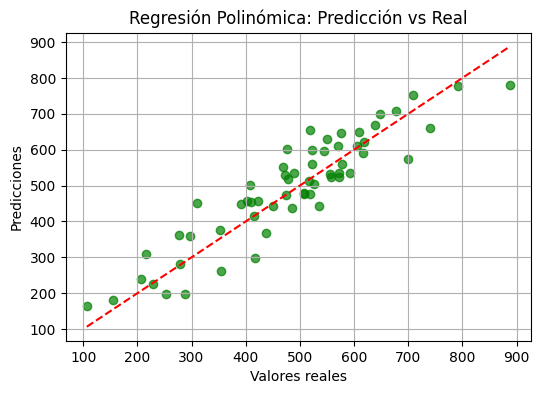

In [49]:
plt.figure(figsize=(6,4))
plt.scatter(yr_test, yr_pred_poli, alpha=0.7, color='green')
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], 'r--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Polinómica: Predicción vs Real")
plt.grid()
plt.show()


In [50]:
from sklearn.model_selection import cross_val_score

# — 4.5.1 Validación Cruzada del Clasificador (accuracy) —
cv_scores_clf = cross_val_score(modelo_arbol, X, y, cv=5, scoring='accuracy')
print("Validación Cruzada (Clasificación):")
print(f"  Accuracies: {cv_scores_clf}")
print(f"  Media: {cv_scores_clf.mean():.3f} ± {cv_scores_clf.std():.3f}\n")

# — 4.5.2 Validación Cruzada del Regresor (RMSE) —
# scikit-learn devuelve neg_mean_squared_error, por eso invertimos el signo
cv_mse_reg = -cross_val_score(modelo_lineal, X_reg, y_reg,
                              cv=5, scoring='neg_mean_squared_error')
cv_rmse_reg = np.sqrt(cv_mse_reg)
print("Validación Cruzada (Regresión Lineal):")
print(f"  RMSE por fold: {cv_rmse_reg}")
print(f"  RMSE medio: {cv_rmse_reg.mean():.2f} ± {cv_rmse_reg.std():.2f}")


Validación Cruzada (Clasificación):
  Accuracies: [0.73333333 0.65       0.76666667 0.68333333 0.68333333]
  Media: 0.703 ± 0.041

Validación Cruzada (Regresión Lineal):
  RMSE por fold: [49.89992681 49.62080895 42.96409333 56.02800494 52.14910049]
  RMSE medio: 50.13 ± 4.26


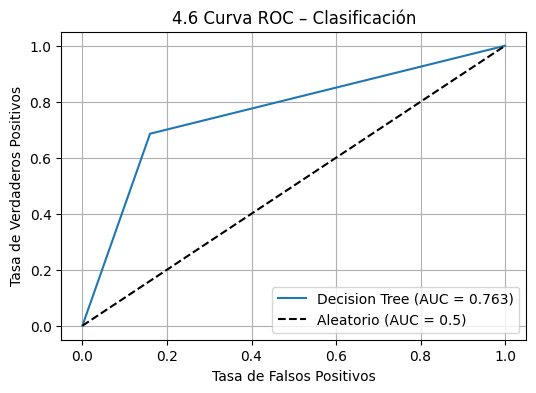

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

# 4.6.1 Obtener probabilidad de clase positiva
y_proba = modelo_arbol.predict_proba(X_test)[:, 1]

# 4.6.2 Calcular puntos de ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# 4.6.3 Graficar la Curva ROC
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--', label='Aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('4.6 Curva ROC – Clasificación')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()